<a href="https://colab.research.google.com/github/ommestriker007/Data_mining/blob/main/Geospatial_Data_Mining_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Install required packages
!pip install geopandas shapely scikit-learn matplotlib contextily

The above code used to install python packages as in Shell - https://stackoverflow.com/questions/60762417/practical-difference-between-pip-and-pip


In [36]:
from google.colab import files

To upload the file from the local drive - https://www.geeksforgeeks.org/machine-learning/ways-to-import-csv-files-in-google-colab/


In [37]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

geopandas can read almost any vector-based spatial data format - https://www.kaggle.com/code/rajkumarpandey02/reading-and-writing-files-in-geopandas#Reading-Spatial-Data


In [38]:
# Replace with your actual .shp filename
world_boundary = gpd.read_file("/content/world-administrative-boundaries-countries.shp")
# Preview the data
world_boundary.head()

,iso3_code,iso2_code,preferred_t,english_sho,french_shor,spanish_sho,russian_sho,chinese_sho,arabic_shor,region_code,region_name,sub_region_,sub_region_,geometry
0,EST,EE,Estonia,Estonia,Estonie (l') [fém.],Estonia,Эстония,爱沙尼亚,إستونيا,150,Europe,Northern Europe,Northern Europe,"MULTIPOLYGON (((22.98485 58.59944, 23.09083 58..."
1,IRQ,IQ,Iraq,Iraq,Iraq (l') [masc.],Iraq (el),Ирак,伊拉克,العراق,142,Asia,Western Asia,Western Asia,"POLYGON ((44.78734 37.14971, 44.76617 37.11228..."
2,AFG,AF,Afghanistan,Afghanistan,Afghanistan (l') [masc.],Afganistán (el),Афганистан,阿富汗,أفغانستان,142,Asia,Southern Asia,Southern Asia,"POLYGON ((74.91574 37.23733, 74.80873 37.22423..."
3,ABW,AW,Aruba,Aruba,None,None,None,None,None,19,Americas,Latin America and the Caribbean,Latin America and the Caribbean,"POLYGON ((-69.87486 12.41528, -69.88224 12.411..."
4,ERI,ER,Eritrea,Eritrea,Érythrée (l') [fém.],Eritrea,Эритрея,厄立特里亚,إريتريا,2,Africa,Sub-Saharan Africa,Sub-Saharan Africa,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15...."


we will upload the .shp file in colab storage and provide the url and call variable - https://www.kaggle.com/code/rajkumarpandey02/reading-and-writing-files-in-geopandas


In [39]:
world_pop = pd.read_csv("/content/world_population.csv")
print(world_pop.head())

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

In [49]:
# Rename 'CCA3' column in world_pop to 'iso3_code' for joining
world_pop_renamed = world_pop.rename(columns={'CCA3': 'iso3_code'})

# Perform a left merge based on 'iso3_code'
world_boundary_pop = world_boundary.merge(world_pop_renamed, on='iso3_code', how='left')
world_boundary_pop = world_boundary_pop.dropna()

# Display the first few rows of the merged dataframe
display(world_boundary_pop.head())

,iso3_code,iso2_code,preferred_t,english_sho,french_shor,spanish_sho,russian_sho,chinese_sho,arabic_shor,region_code,...,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,cluster
0,EST,EE,Estonia,Estonia,Estonie (l') [fém.],Estonia,Эстония,爱沙尼亚,إستونيا,150,...,1331535.0,1396877.0,1570674.0,1476983.0,1361999.0,45227.0,29.3201,0.9980,0.02,0.0
1,IRQ,IQ,Iraq,Iraq,Iraq (l') [masc.],Iraq (el),Ирак,伊拉克,العراق,142,...,31264875.0,24628858.0,17658381.0,13653369.0,9811347.0,438317.0,101.5158,1.0221,0.56,0.0
2,AFG,AF,Afghanistan,Afghanistan,Afghanistan (l') [masc.],Afganistán (el),Афганистан,阿富汗,أفغانستان,142,...,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52,0.0
4,ERI,ER,Eritrea,Eritrea,Érythrée (l') [fém.],Eritrea,Эритрея,厄立特里亚,إريتريا,2,...,3147727.0,2392880.0,2149960.0,1657982.0,1272748.0,117600.0,31.3268,1.0176,0.05,0.0
5,PAN,PA,Panama,Panama,Panama (le),Panamá,Панама,巴拿马,بنما,19,...,3623617.0,3001731.0,2449968.0,1956987.0,1516188.0,75417.0,58.4561,1.0132,0.06,0.0


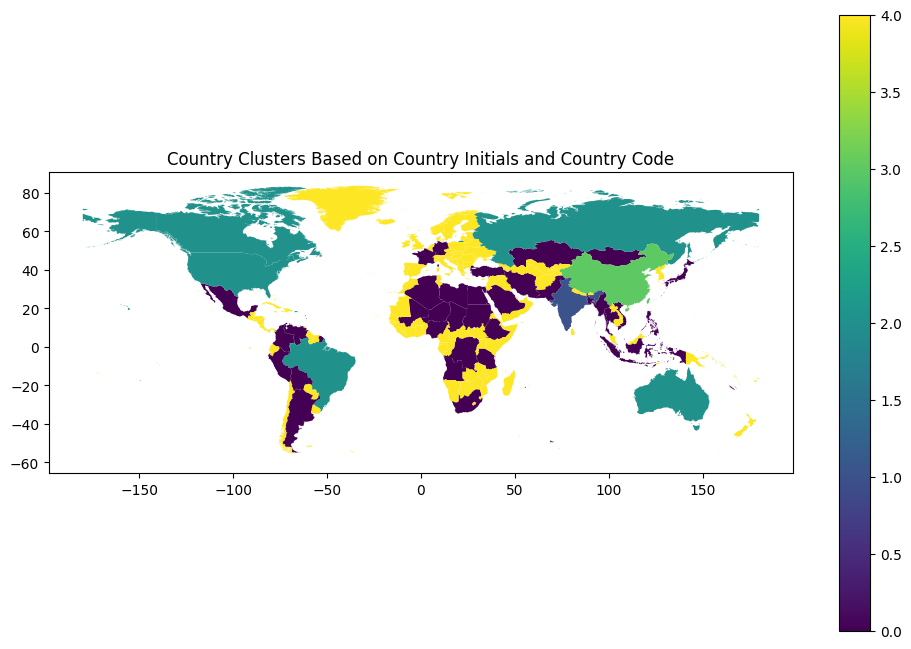

In [50]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features
X = world_boundary_pop[['2020 Population', 'Area (km²)']].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
world_boundary_pop['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
world_boundary_pop.plot(column='cluster', legend=True, figsize=(12, 8))
plt.title("Country Clusters Based on Country Initials and Country Code")
plt.show()

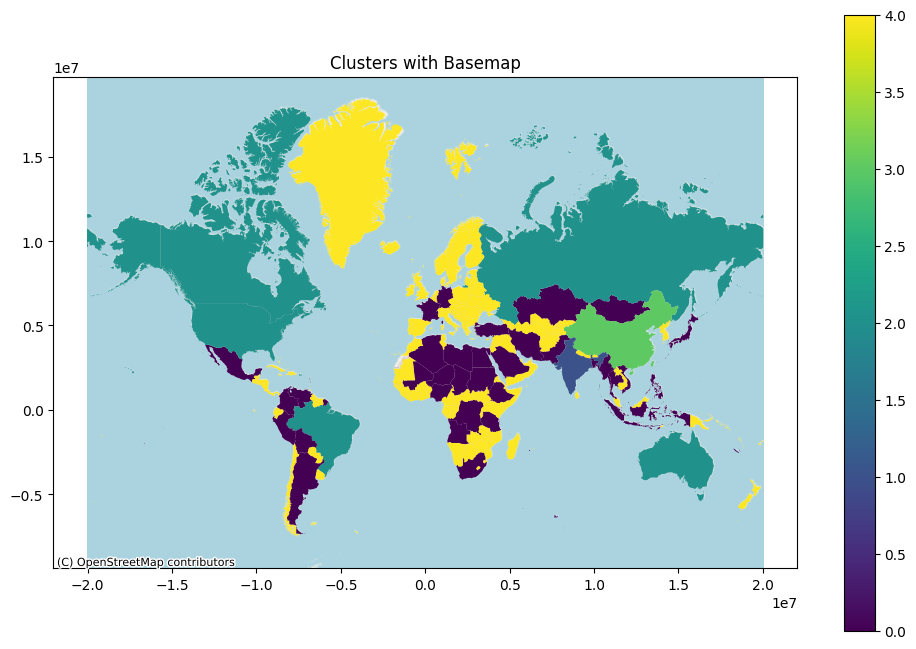

In [52]:
import contextily as ctx

# Convert to Web Mercator
world_web = world_boundary_pop.to_crs(epsg=3857)

# Plot with basemap
ax = world_web.plot(column='cluster', figsize=(12, 8), legend=True)
# Use a different provider, e.g., OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Clusters with Basemap")
plt.show()